# <center>Data Science and Business Analytics
## <center>Task-2 : Prediction using UnSupervised ML
### Name : Selvan Kumar M

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [2]:
iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
iris_data.drop(columns=['Id'],axis=1,inplace=True)

In [6]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.groupby('Species').describe()

PetalLengthCm                                               \
                        count   mean       std  min  25%   50%    75%  max   
Species                                                                      
Iris-setosa              50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor          50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica           50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                PetalWidthCm        ...  SepalLengthCm      SepalWidthCm  \
                       count   mean ...            75%  max        count   
Species                             ...                                    
Iris-setosa             50.0  0.244 ...            5.2  5.8         50.0   
Iris-versicolor         50.0  1.326 ...            6.3  7.0         50.0   
Iris-virginica          50.0  2.026 ...            6.9  7.9         50.0   

                                                               
                  mean       std  min    25%  50%    75%  max  
Species                                                        
Iris-setosa      3.418  0.381024  2.3  3.125  3.4  3.675  4.4  
Iris-versicolor  2.770  0.313798  2.0  2.525  2.8  3.000  3.4  
Iris-virginica   2.974  0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

## Visualizing the given data

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


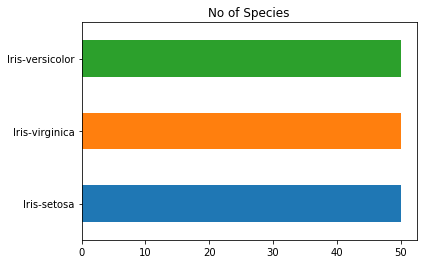

In [8]:
Species = iris_data['Species'].value_counts()
print(Species)
plt.title('No of Species')
Species.plot.barh();

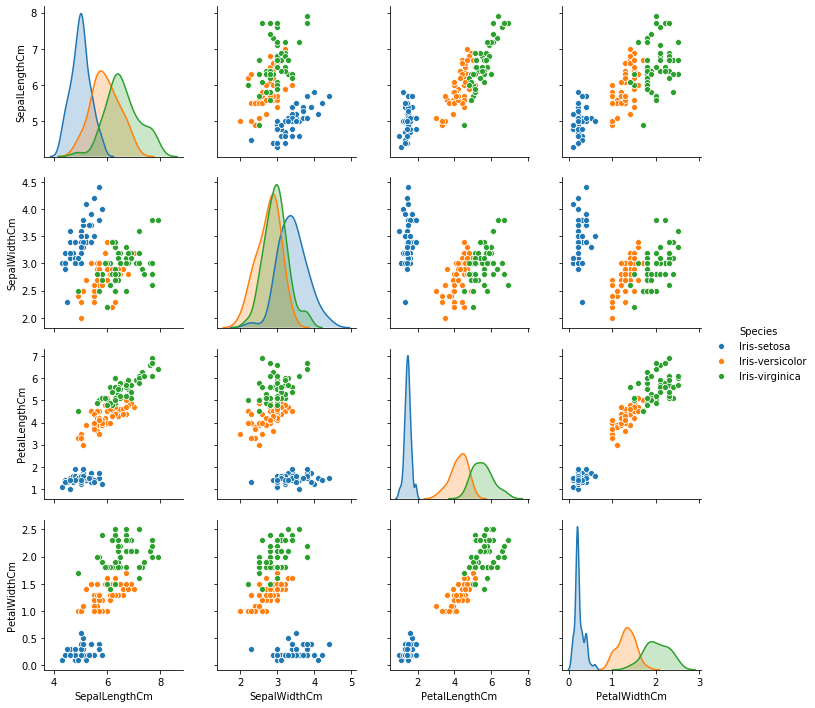

In [9]:
sns.pairplot(iris_data, hue='Species');

## Taking input features

In [10]:
x=iris_data.iloc[:,[0,1,2,3]].values

## Implementing k-means cluster

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
# Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

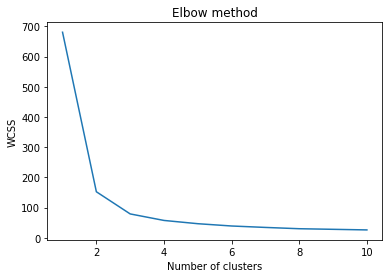

In [14]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

## Applying k-means

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [16]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Plotting the clurster 

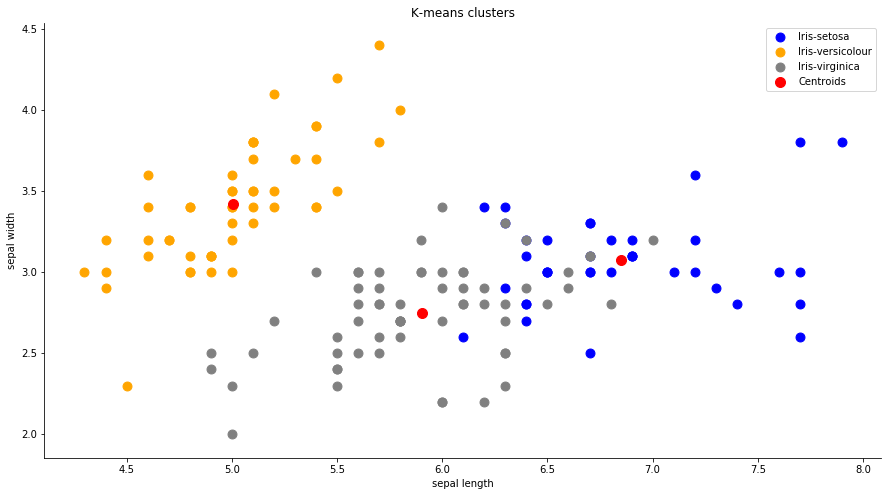

In [17]:
plt.figure(figsize=(15,8))
plt.title('K-means clusters')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=80, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 80, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 80, c = 'grey', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'red', label = 'Centroids')
plt.legend(loc=1);
plt.xlabel('sepal length')
plt.ylabel('sepal width')
sns.despine(top=True, right=True)